In [8]:
import h5py
import hdf5plugin
import matplotlib.pyplot as plt

In [5]:
# change path to where you saved the dataset
path = "../submission/data/G-5000/test_g5000_1000.h5"

In [6]:
with h5py.File(path, 'r') as f:
    bead_patterns = f["bead_patterns"][:10]
    z_vel_mean_sq = f["z_vel_mean_sq"][:10]
    z_abs_velocity = f["z_abs_velocity"][:10]
    sample_mat = f["sample_mat"][:10]

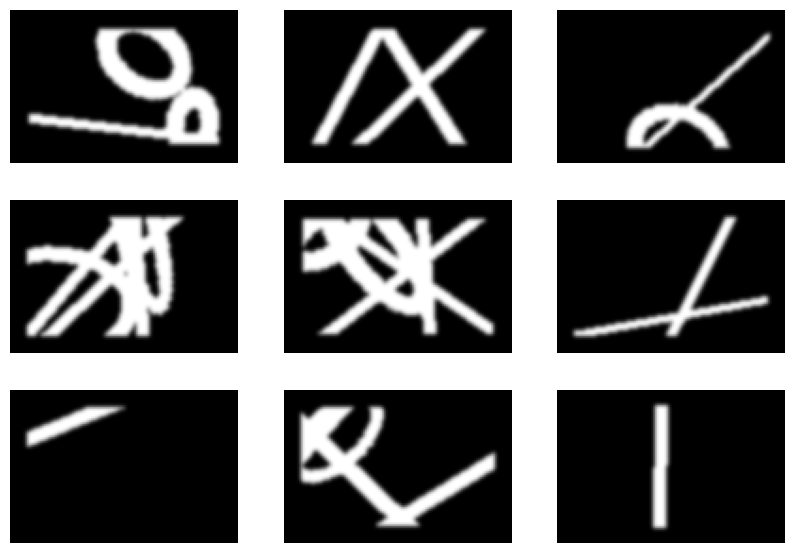

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(10,7))
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(bead_patterns[i*3+j], cmap='gray')
        axs[i, j].axis('off')

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def plot_frequency(frequency=0, idx=0):
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    beading_pattern = bead_patterns[idx]
    field_solution = z_abs_velocity[idx, frequency]
    frequency_response = z_vel_mean_sq[idx]
    scalar_parameter = sample_mat[idx]
    print("Order of parameters: height, width, thickness, damping loss factor ")
    print(scalar_parameter)
    ax[0].imshow(beading_pattern, cmap='gray')
    ax[0].set_title("beading pattern")
    ax[0].axis('off')
    ax[1].imshow(field_solution, cmap='gray')
    ax[1].set_title("field solution")
    ax[1].axis('off')
    ax[2].plot(np.arange(300), frequency_response)

    # add a vertical line to show the selected frequency
    ax[2].axvline(x=frequency, color='red', linestyle='--', label='Selected Frequency')

    ax[-1].legend()
    plt.tight_layout()
    plt.show()
    return None

plot = interact(plot_frequency, idx=(0, 9, 1), frequency=(0, 299, 1))

interactive(children=(IntSlider(value=0, description='frequency', max=299), IntSlider(value=0, description='id…